The calculated Value of rolling_controling_mse is : [2.35272685e-04 3.35572096e-03 3.88589462e-03 ... 2.56257233e-03
 9.02805352e-04 3.46408558e-05]


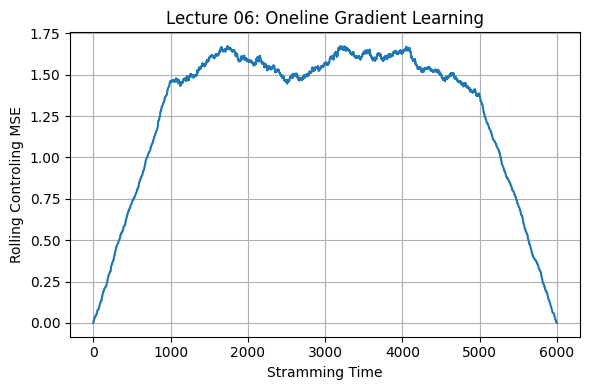

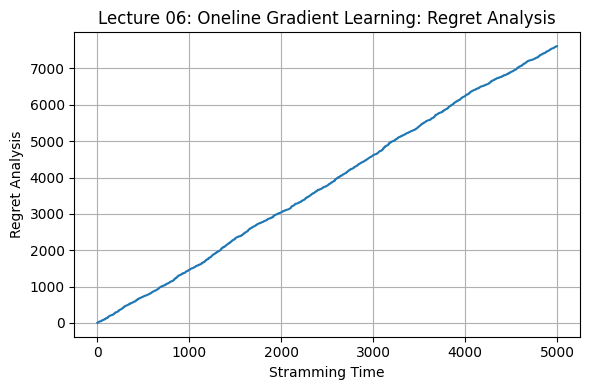

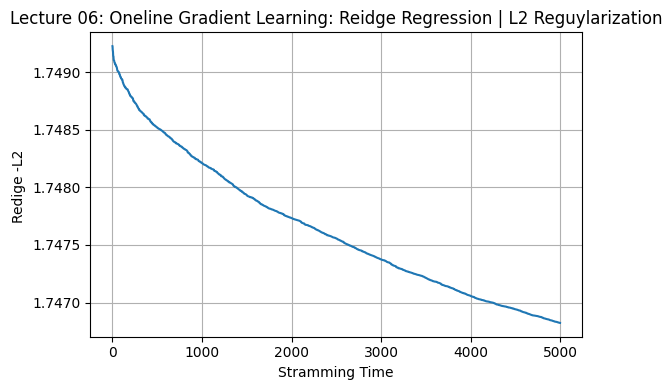

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm


np.random.seed(42)

feature_dimention = 5
streaming_steps = 5000
sigma = 0.05
learning_rate_eta = 0.00001

# Synthetic Data
w_true = np.random.randn(feature_dimention)
X = np.random.randn(streaming_steps, feature_dimention)
Y = X @ w_true +  sigma* np.random.randn(streaming_steps)

XtX = X.T @ X
XtY = X.T @ Y
w_star  = np.linalg.pinv(XtX) @ XtY

w = np.zeros(feature_dimention)
losses  = []
regrets = []
cum_regret = 0.0 # += 
weights_erros = []

for time in range(streaming_steps):
    x_t = X[time]
    y_t = Y[time]
    pred = x_t @ w
    error_time = y_t - pred
    loss_time = 0.5*(error_time**2)


    # Regret Analysis
    error_star  = y_t - x_t @ w_star
    loss_star = 0.5*(error_star**2)
    cum_regret += (loss_time - loss_star)
    regrets.append(cum_regret)
    losses.append(loss_time)
    weights_erros.append(norm(w-w_true))


    learning_rate_etau =  learning_rate_eta / np.sqrt(time+1)
    gradiant = - (error_time) * x_t
    w = w  - learning_rate_etau * gradiant


window  = 1000
rolling_controling_mse = np.convolve(losses, np.ones(window)/window)

# print(f"The calculated Value of losses is : {losses}")
# print(f"The calculated Value of regrets is : {regrets}")
# print(f"The calculated Value of cum_regret is : {cum_regret}")
# print(f"The calculated Value of weights_erros is : {weights_erros}")

print(f"The calculated Value of rolling_controling_mse is : {rolling_controling_mse}")

len(rolling_controling_mse)

plt.figure(figsize = (6, 4))
plt.plot(rolling_controling_mse)
plt.title("Lecture 06: Oneline Gradient Learning")
plt.xlabel("Stramming Time")
plt.ylabel("Rolling Controling MSE")
plt.tight_layout()
plt.grid()
plt.show()

plt.figure(figsize = (6, 4))
plt.plot(regrets)
plt.title("Lecture 06: Oneline Gradient Learning: Regret Analysis")
plt.xlabel("Stramming Time")
plt.ylabel("Regret Analysis")
plt.tight_layout()
plt.grid()
plt.show()

plt.figure(figsize = (6, 4))
plt.plot(weights_erros)
plt.title("Lecture 06: Oneline Gradient Learning: Reidge Regression | L2 Reguylarization")
plt.xlabel("Stramming Time")
plt.ylabel("Redige -L2 ")
plt.tight_layout()
plt.grid()
plt.show()